# **Sentiment Analysis with Logistic Regression**

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Sample Dataset**

In [2]:
# Create a simple dataset
data = {
    "text": [
        "I love this product, it is amazing!",
        "Worst experience ever. I hate it.",
        "The service was good and the staff was friendly.",
        "This is the most terrible movie I have ever seen.",
        "I am very happy with the quality.",
        "Not worth the money, very disappointing.",
        "The taste of the food was fantastic!",
        "I will never buy this again, awful service.",
        "Such a wonderful experience, highly recommend!",
        "It was okay, not great but not bad either."
    ],
    "label": [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 = Positive, 0 = Negative
}

In [3]:
df = pd.DataFrame(data)
df

,text,label
0,"I love this product, it is amazing!",1
1,Worst experience ever. I hate it.,0
2,The service was good and the staff was friendly.,1
3,This is the most terrible movie I have ever seen.,0
4,I am very happy with the quality.,1
5,"Not worth the money, very disappointing.",0
6,The taste of the food was fantastic!,1
7,"I will never buy this again, awful service.",0
8,"Such a wonderful experience, highly recommend!",1
9,"It was okay, not great but not bad either.",1


## **2. Train-Test Split**

In [4]:
X = df["text"]
y = df["label"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **3. Feature Extraction (TF-IDF)**

In [6]:
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## **4. Train Logistic Regression Model**

In [7]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

## **5. Predictions & Evaluation**

In [8]:
y_pred = model.predict(X_test_tfidf)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


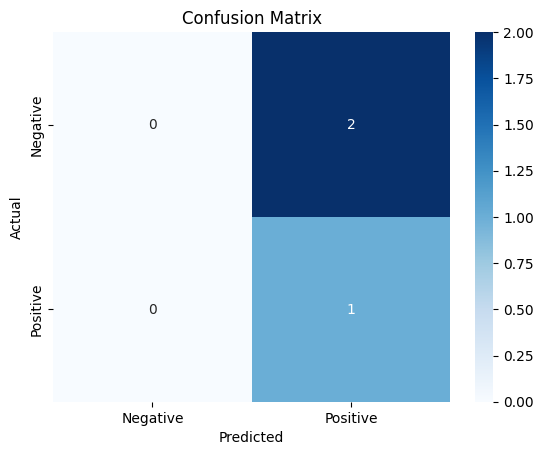

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **6. Test on New Sentences**

In [11]:
new_texts = [
    "I really enjoyed this movie!",
    "The product was awful and I want a refund.",
    "Service was decent, nothing special."
]

In [12]:
new_tfidf = vectorizer.transform(new_texts)
predictions = model.predict(new_tfidf)

In [13]:
for txt, pred in zip(new_texts, predictions):
    print(f"Text: {txt} --> Sentiment: {'Positive' if pred == 1 else 'Negative'}")

Text: I really enjoyed this movie! --> Sentiment: Positive
Text: The product was awful and I want a refund. --> Sentiment: Positive
Text: Service was decent, nothing special. --> Sentiment: Positive
